# 从零手搓中文大模型｜🚀Day01

## 参考项目搜集

- [nano-llama31](https://github.com/karpathy/nano-llama31/tree/master)

    - Karpathy大神的项目，用700多行代码完成了一个尽可能低依赖的最简洁`Llama3.1`实现，能够进行训练、微调和推理（跪拜🧎‍♂️）

- [TinyLlama](https://github.com/jzhang38/TinyLlama/blob/main/README_zh-CN.md)

    - `TinyLlama`项目在3万亿tokens上进行预训练，构建一个拥有`1.1B`参数的`Llama`模型
    
    - 采用了与`Llama 2`完全相同的架构和分词器

- [baby-llama2-chinese](https://github.com/DLLXW/baby-llama2-chinese?tab=readme-ov-file)

    - 中文数据从头训练+SFT的一个小参数实现，可以在`24G`单卡运行；目前包含：**预训练**、**SFT指令微调**，**奖励模型**以及**强化学习**待做（但似乎已经断更3个月）
    
    - 基于`Llama 2`架构
    
- [ChatLM-mini-Chinese](https://github.com/charent/ChatLM-mini-Chinese)

    - 中文对话0.2B小模型（ChatLM-Chinese-0.2B），开源所有**数据集来源、数据清洗、tokenizer训练、模型预训练、SFT指令微调、RLHF优化**等流程的全部代码
    
    - 支持下游任务`sft`微调，给出了三元组信息抽取任务的微调示例
    
    - 有意思的是作者选的模型架构是`T5`，还有另一个衍生项目用的是`phi-2`架构

除了第一个K神的项目是关于模型实现，后面三个项目的`README.md`文件看一遍下来，对于后续整体的实现流程心里便能有了一个大致的概念。

之后遇到了实际问题时再去里面寻找细节来参考。

## 数据集确定

这个计划的主要目地是能从头熟悉一遍大模型训练的流程，所以不需要收集大量的文本数据集（我显然也没有那么多的GPU资源能让我在超大的数据集上快速训练🤷‍♂️）

之前看到微软的一篇论文[TinyStories](https://arxiv.org/abs/2305.07759)，探索的是语言模型在多小的情况下还能流利地讲故事。

为此他们构造了一个小数据集，包含了一些小故事，我觉得这个数据集很适合我这个项目的目标，所以决定使用这个数据集。

由于希望在中文数据集上进行实践，所以原本的打算是通过机器翻译把数据集翻译一遍。

结果发现已经有人做了这个工作，所以我打算直接使用这个翻译好的[数据集](https://huggingface.co/datasets/adam89/TinyStoriesChinese)。🙏感谢大佬们的无私奉献。

一个样例如下：
```json
{
    "story": "\n\nLily and Ben are friends. They like to play in the park. One day, they see a big tree with a swing. Lily wants to try the swing. She runs to the tree and climbs on the swing.\n\"Push me, Ben!\" she says. Ben pushes her gently. Lily feels happy. She swings higher and higher. She laughs and shouts.\nBen watches Lily. He thinks she is cute. He wants to swing too. He waits for Lily to stop. But Lily does not stop. She swings faster and faster. She is having too much fun.\n\"Can I swing too, Lily?\" Ben asks. Lily does not hear him. She is too busy swinging. Ben feels sad. He walks away.\nLily swings so high that she loses her grip. She falls off the swing. She lands on the ground. She hurts her foot. She cries.\n\"Ow, ow, ow!\" she says. She looks for Ben. She wants him to help her. But Ben is not there. He is gone.\nLily feels sorry. She wishes she had shared the swing with Ben. She wishes he was there to hug her. She limps to the tree. She sees something hanging from a branch. It is Ben's hat. He left it for her.\nLily smiles. She thinks Ben is nice. She puts on his hat. She hopes he will come back. She wants to say sorry. She wants to be friends again.",
    "instruction": {
        "prompt:": "Write a short story (3-5 paragraphs) which only uses very simple words that a 3 year old child would understand. The story should use the verb \"hang\", the noun \"foot\" and the adjective \"cute\". The story has the following features: the story should contain at least one dialogue. Remember to only use simple words!\n\nPossible story:",
        "words": [
            "hang",
            "foot",
            "cute"
        ],
        "features": [
            "Dialogue"
        ]
    },
    "summary": "Lily and Ben play in the park and Lily gets too caught up in swinging, causing Ben to leave. Lily falls off the swing and hurts herself, but Ben leaves his hat for her as a kind gesture.",
    "source": "GPT-4",
    "story_zh": "莉莉和本是朋友。他们喜欢在公园里玩。有一天，他们在一棵大树下看到了一个秋千。莉莉想试试那个秋千。她跑到树下，爬上了秋千。\n\"推我，本！\"她说。本轻轻地推了她一下。莉莉感到很开心。她越荡越高，笑着喊叫。\n本看着莉莉。他觉得她很可爱。他也想荡秋千。他在莉莉停下来之后等着。但是莉莉没有停下来。她越荡越快。她玩得太高兴了。\n\"我也可以荡秋千吗，莉莉？\"本问。莉莉没听到他的话。她忙着荡秋千。本觉得很难过。他走开了。\n莉莉荡得太高，失去了平衡。她从秋千上摔下来，落在地上。她扭伤了脚。她哭了起来。\n\"哎呀，哎呀，哎呀！\"她说。她在找本。她希望他能帮助她。但本不在那里。他走了。\n莉莉感到很抱歉。她希望她能和本分享秋千。她希望他在那里拥抱她。她一瘸一拐地走到树下。她看到有什么东西挂在树枝上。那是本的帽子。他留给她的。\n莉莉笑了。她觉得本很好。她戴上了他的帽子。她希望他会回来。她想道歉。她想再次成为朋友。"
}
```

### 数据清洗
在标准的流程里，**文本数据量会非常大**且来自于不同的来源，无论从**质量**上和**内容重复度**上都需要进行清洗。

由于这个数据集是一个单独的小数据集，所以我打算先**跳过这一步**。

不过这里还是简单说一下数据清洗的一些方法：
- 去除重复数据
  - 当量级巨大的时候一般会采用`SimHash`或者`MinHash`的方法
  - 短文本过滤（太短的文本对于模型训练而言意义不大，可以直接去除）
- 去除低质量数据
  - 一般会采用一些规则或者模型来判断文本的质量，例如：**语法错误、拼写错误、不合理内容、无意义数据**等
  - 这一步的成本会比较高，因为需要人工标注或者构建模型（但高质量的数据对于模型训练是非常重要的）

## 训练框架选择

一个好的训练框架还是很重要的。

在上面的参考项目中发现了这个名为[⚡️litgpt](https://github.com/Lightning-AI/litgpt/tree/main)的大模型预训练/微调/部署框架，而且其模型实现代码是基于上面Karpahty大神的`nano-llama31`项目。

框架已经支持了`20+`大模型，包括最新的`Llama 3.1`。大概看了一下代码仓库，结构清晰且简洁。

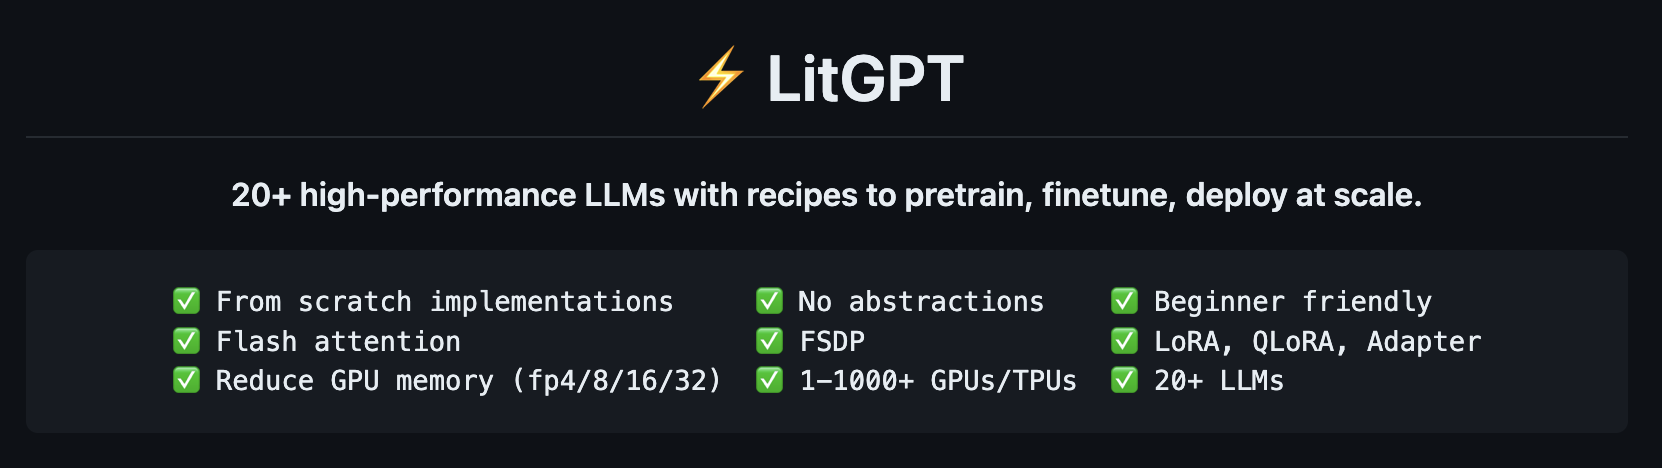

另外一个框架是[Llama-Factory](https://github.com/hiyouga/LLaMA-Factory/blob/main/README_zh.md)，已经有29k的stars，支持`100+`大模型（尤其是对国内的开源模型支持很好）。

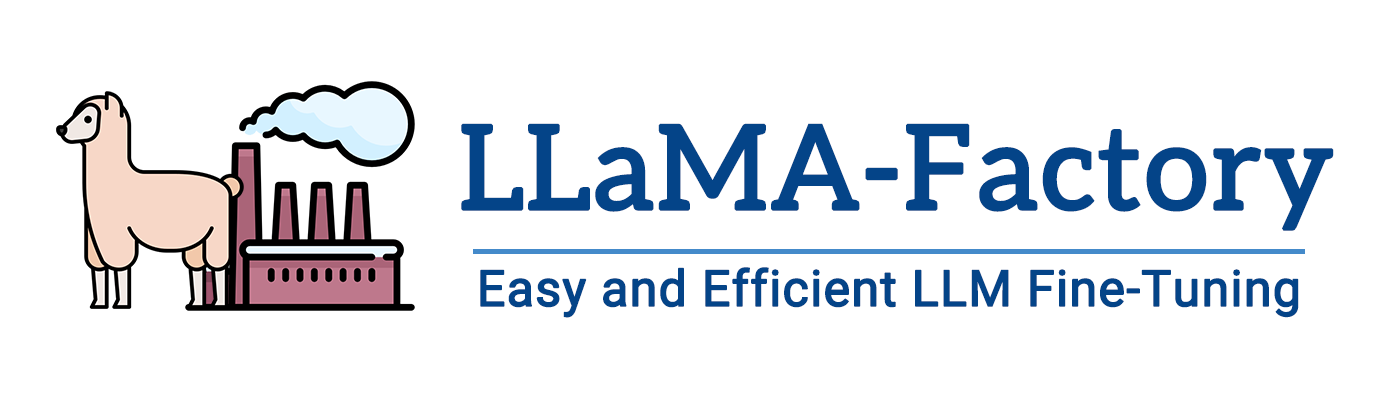

所以我决定花时间简单了解一下这两个框架然后选一个作为后续的训练工具。

个人觉得如今的大模型训练框架已经非常成熟，大家都在追求**更高的性能和更好的易用性**，所以**选择一个好的框架**对于后续的工作来说是非常重要的。

也没有必要自己造轮子，毕竟大家都在造了，我们只需要选择一个适合自己的就好了。

> 经过调研发现`Llama-Factory`似乎~~只能支持和发布的开源模型参数一致的模型（也可能是我看的不仔细没有找到修改配置的地方，如果是这样欢迎大家指出）~~。
> 
> 而litgpt则支持自定义模型参数，
> 由于我后面是希望限制参数量级在一个很小的范畴，所以决定使用litgpt作为后续的训练工具。

⚠️更新：

后续也找到了`Llama-Factory`里从0训练并且修改参数的方法（修改`config.json`的配置，并且添加`train_from_scratch=True`参数），

但`litgpt`的代码架构更加简洁，没有过多的抽象和封装，并且有一些训练加速的优化（`Llama-Factory`是基于`transformers`库），

因此最后还是决定使用`litgpt`。

## 小结
1. 确定了项目的数据集来源
2. 了解了一些数据清洗的方法
3. 选择了litgpt作为后续的训练工具
4. 了解了一些参考项目，对后续的实现流程有了一个大致的概念